In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#데이터셋 불러오기

* seaborn 패키지의 load_dataset() 활용

In [52]:
# sns.load_dataset 함수를 이용하여, penguins 데이터를 불러와주세요
pg = sns.load_dataset('penguins')

In [53]:
# 데이터 확인하기
print(pg.shape)
pg.head(5)

(344, 7)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


# Nan값 확인하고 없애주기

* 데이터셋 안에 있는 Nan값을 확인해주세요.

* 각 Column 별로 몇 개의 Nan값이 있는지 확인해볼까요?

In [54]:
# 데이터셋의 각 Column별로 nan값이 얼마나 있는지 확인해볼까요? isna(), sum() 함수 이용
pg.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

* Nan값이 포함된 Row를 삭제해봅시다.

In [55]:
# dropna() 함수를 이용해서, 데이터셋 안에 nan값이 포함된 row를 삭제해보세요.
# axis, how, inplace 를 어떻게 지정해야할까요?
pg.dropna(axis= 0, how= 'any',inplace= True)

In [56]:
pg.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


#시각화로 데이터 살펴보기

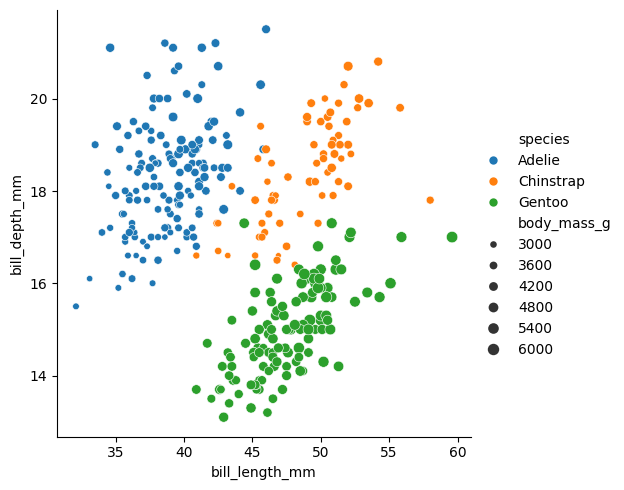

In [57]:
# 여러 Feature 정보를 한 눈에 나타내봅시다.
# bill_length_mm, bill_depth_mm, body_mass_g, species Column들을 한 그림에 나타내보세요.
# relplot 함수 활용
sns.relplot(data = pg, 
            x = 'bill_length_mm', y = 'bill_depth_mm', 
            size = 'body_mass_g', hue = 'species' )

------------------------------------------

#데이터 인코딩

In [58]:
# 먼저, species Column에는 몇 개의 unique한 값이 있는지 확인해봅시다
# pd.unique() 함수 활용.
pd.unique(pg['species'])

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [59]:
pg['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

---------------------------------

## 데이터 인코딩 : Scikit-learn의 LabelEncoder 활용

In [60]:
from sklearn import preprocessing   #LabelEncoder()를 쓰기위해 먼저 불러와야 하는 패키지

###인코딩 하기 : fit_transform()

In [61]:
# 어떻게 나눠보면 좋을까요? 먼저 Label Encoder 기능을 이용해봅시다.
# fit_transform()함수 활용하여
# 'species'를 숫자로 encoding 해보세요.

le = preprocessing.LabelEncoder()
pg['species'] = le.fit_transform(pg['species'])
pg.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female
4,0,Torgersen,36.7,19.3,193.0,3450.0,Female
5,0,Torgersen,39.3,20.6,190.0,3650.0,Male


###원래의 값 확인하기 : inverse_transform()@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [62]:
# Label Encoder은, 인코딩 된 값을 원래의 값으로 돌려줄 수 있습니다.
# index가 200인 펭귄을 불러와 봅시다. ( iloc 이용 )
pg.iloc[200]

species                   1
island                Dream
bill_length_mm         42.5
bill_depth_mm          17.3
flipper_length_mm     187.0
body_mass_g          3350.0
sex                  Female
Name: 206, dtype: object

In [63]:
# 이 펭귄의 서식지는 어디인가요? species의 원래 값은 무엇인가요?
# inverse_transform() 함수 활용
le.inverse_transform([ pg.iloc[200]['species'] ])

array(['Chinstrap'], dtype=object)

--------------------------------

##데이터 인코딩 : pd.map 함수 활용

In [64]:
pg.head(3)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,Male
1,0,Torgersen,39.5,17.4,186.0,3800.0,Female
2,0,Torgersen,40.3,18.0,195.0,3250.0,Female


In [65]:
# 이번에는 성별 값을 map 함수를 이용해 인코딩해 봅시다.
# map 함수는 딕셔너리 자료형으로 인코딩할 정보를 전달해줘야합니다.
pg['sex'] = pg['sex'].map({'Male':0, 'Female': 1} )
pg.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,Torgersen,39.1,18.7,181.0,3750.0,0
1,0,Torgersen,39.5,17.4,186.0,3800.0,1
2,0,Torgersen,40.3,18.0,195.0,3250.0,1
4,0,Torgersen,36.7,19.3,193.0,3450.0,1
5,0,Torgersen,39.3,20.6,190.0,3650.0,0


------------------------------

##데이터 인코딩 : pd.get_dummies 활용

In [66]:
# 이제 island Column이 남았습니다.
# 이번에는 pd.get_dummies 함수를 활용하여 인코딩해 봅시다!

In [67]:
pg['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

### Feature 분할시키기 : pd.get_dummies() @@@@@@@@@@@@@@@@@@@@@@@@@@@@

In [68]:
# pd.get_dummies()로 하나의 Col을 여러개로 나누어보세요.
# prefix는 island로 지정해주세요
island_dummies = pd.get_dummies(pg['island'], prefix='island', dtype =int)
island_dummies.head(5)

,island_Biscoe,island_Dream,island_Torgersen
0,0,0,1
1,0,0,1
2,0,0,1
4,0,0,1
5,0,0,1


### Dataframe 이어주기 : pd.concat()

In [69]:
# 만든 dummies를 원래의 데이터셋 (pg) 에 붙여봅시다
# pd.concat 함수 활용. 합치고 싶은 Dataframe을 리스트 형태로 묶어줘야 합니다.

In [70]:
pg_dummies = pd.concat([pg, island_dummies], axis =1)
pg_dummies.head(5)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,Torgersen,39.1,18.7,181.0,3750.0,0,0,0,1
1,0,Torgersen,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,Torgersen,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,Torgersen,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,Torgersen,39.3,20.6,190.0,3650.0,0,0,0,1


In [71]:
# 원래의 island 를 삭제해 봅시다.

###원래의 Column 삭제하기 : dataframe.drop()

In [74]:
pg_dummies.drop('island', axis=1, inplace = True)
pg_dummies.head(5)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,39.3,20.6,190.0,3650.0,0,0,0,1


In [75]:
pg_dummies.head(5)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
0,0,39.1,18.7,181.0,3750.0,0,0,0,1
1,0,39.5,17.4,186.0,3800.0,1,0,0,1
2,0,40.3,18.0,195.0,3250.0,1,0,0,1
4,0,36.7,19.3,193.0,3450.0,1,0,0,1
5,0,39.3,20.6,190.0,3650.0,0,0,0,1


--------------------------------------

# Train / Test Set 분할하기

## X, Y 를 나누어주기

In [76]:
# 데이터셋을 X, Y로 나누어 봅시다.
X = pg_dummies.drop('species', axis =1)
Y = pg_dummies['species']

##  Train / Test Set 분할하기 : train_test_split()

In [77]:
# Train set과 Test set을 나눠봅시다.
from sklearn.model_selection import train_test_split

In [78]:
# Test로 쓰일 데이터는 30% 비율로 하려고 합니다.
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.3)

In [79]:
xTrain.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,island_Biscoe,island_Dream,island_Torgersen
327,53.4,15.8,219.0,5500.0,0,1,0,0
163,51.7,20.3,194.0,3775.0,0,0,1,0
314,44.5,14.7,214.0,4850.0,1,1,0,0
273,50.1,15.0,225.0,5000.0,0,1,0,0
128,39.0,17.1,191.0,3050.0,1,0,0,1


In [80]:
xTrain.shape

(233, 8)

In [81]:
xTest.shape

(100, 8)